Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [1]:
import wrangle_zillow as wr

In [2]:
df = wr.wrangle_zillow()
df.head()

,Unnamed: 0,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura
2,2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Orange
3,3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Los_Angeles
4,4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Los_Angeles


In [3]:
df.shape

(69729, 23)

In [4]:
df = df.drop(columns = 'Unnamed: 0')

In [5]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,21412.0,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,396551.0,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Los_Angeles
4,10887214,3.0,3.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,12447.0,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Los_Angeles


In [6]:
# split the columns in categorical and not categorical: 
target = 'logerror'

cat_cols, num_cols = [], []
# for a column in the x_train data frame:
for col in df.columns:
    # if the column is an object:
    if df[col].dtype == 'O':
        # add the column to the category list
        cat_cols.append(col)
    # else not an object:   
    else:
        # if the column has unique values under 10:
        if df[col].nunique() < 10:
            # add the columns to category list
            cat_cols.append(col)
        # else not object and unique is not under 10:
        else:
            # and the column to the numbers list
            num_cols.append(col)

In [7]:
cat_cols

['fips', 'regionidcounty', 'assessmentyear', 'transactiondate', 'county']

In [8]:
num_cols

['parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'rawcensustractandblock',
 'regionidcity',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror']

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Distribution of parcelid


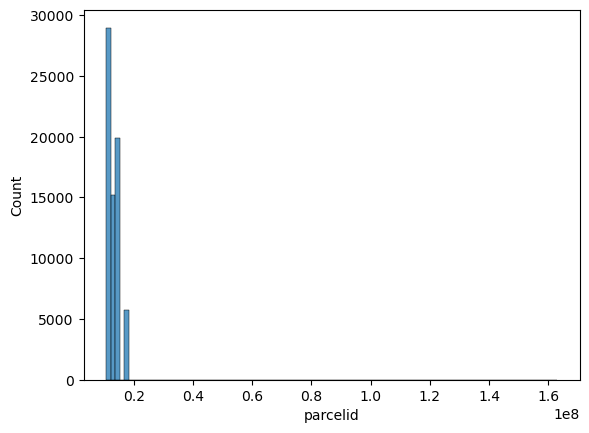

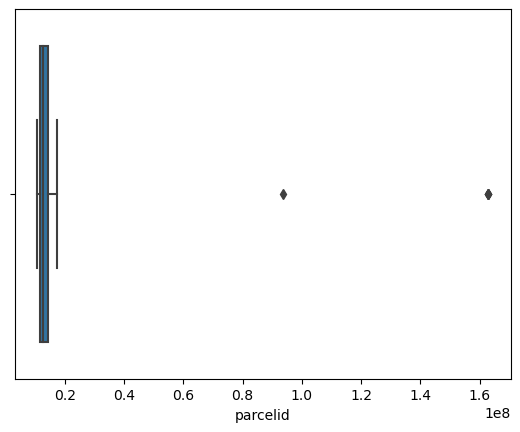

Distribution of bathroomcnt


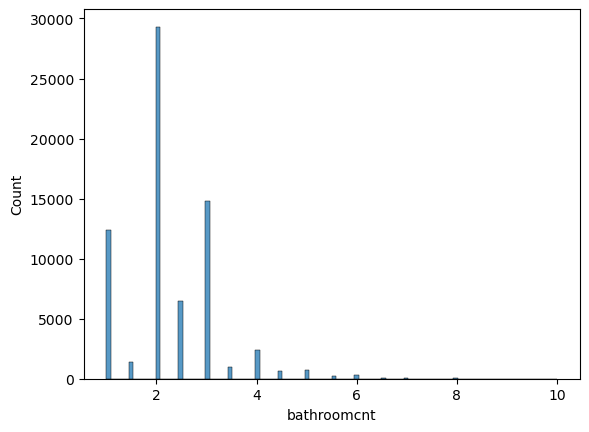

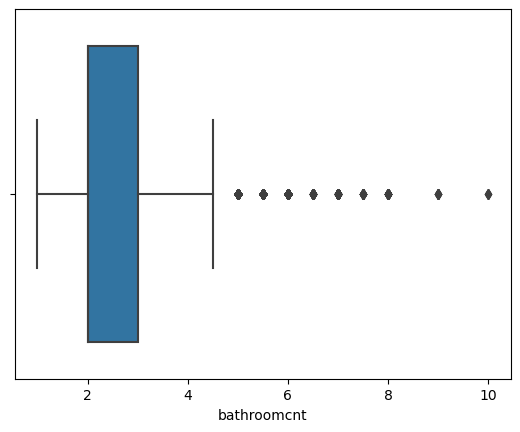

Distribution of bedroomcnt


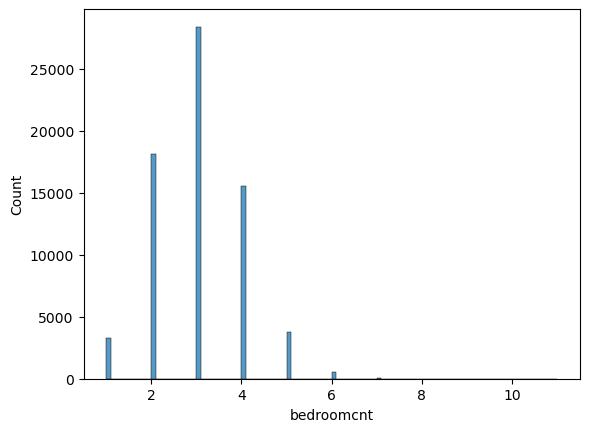

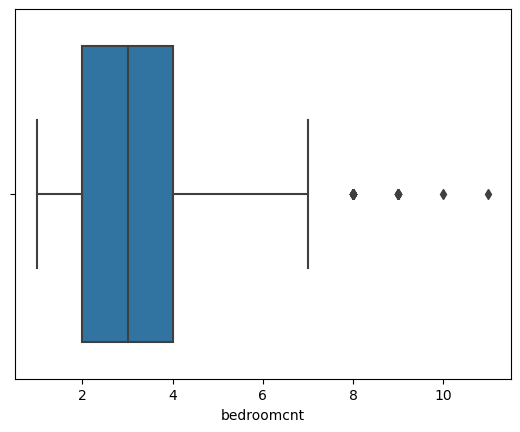

Distribution of calculatedfinishedsquarefeet


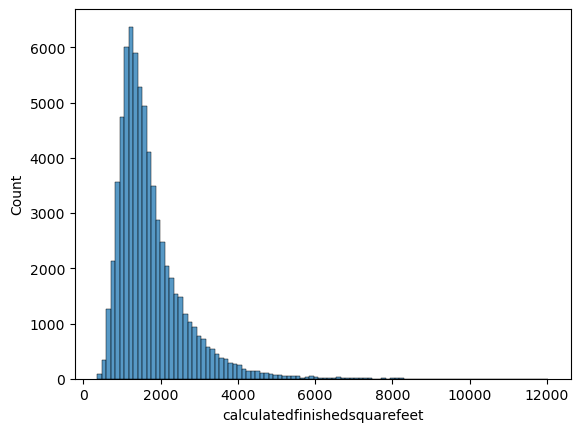

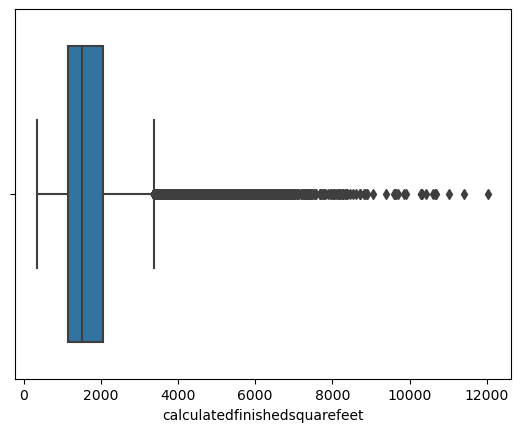

Distribution of latitude


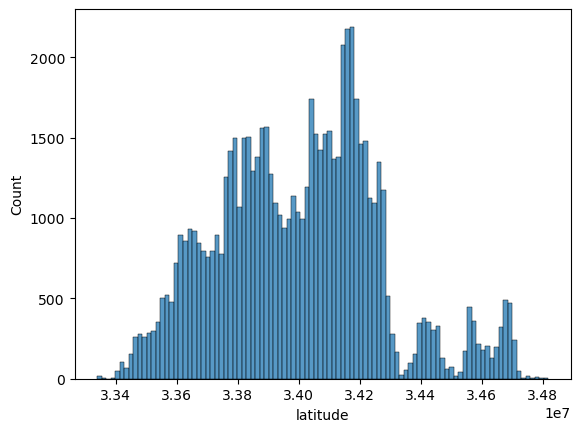

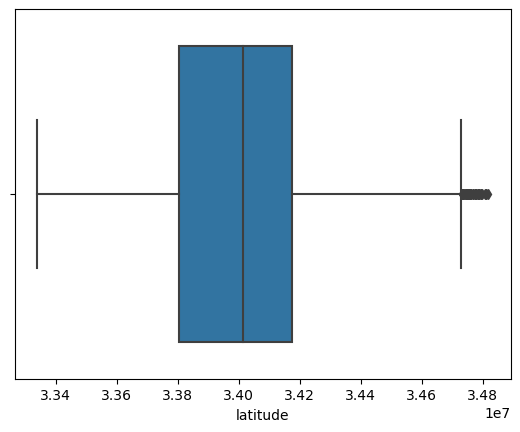

Distribution of longitude


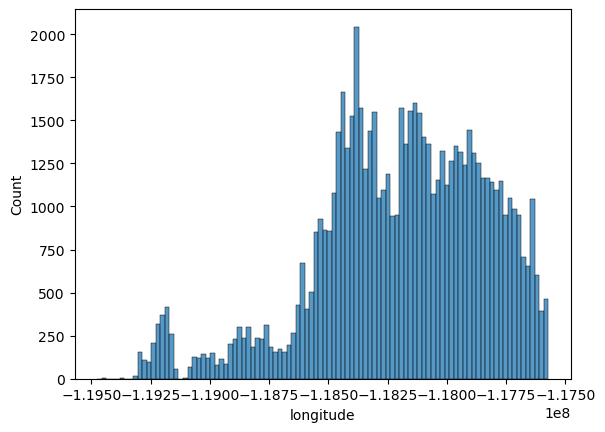

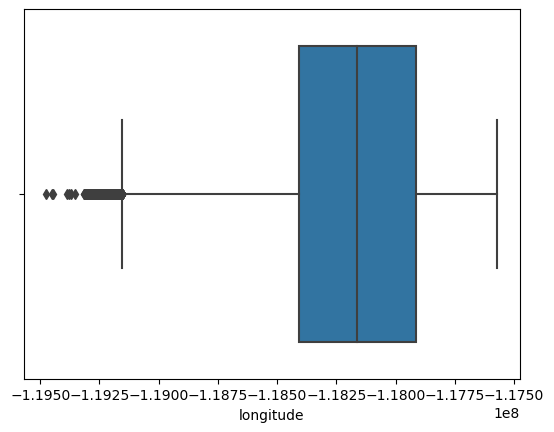

Distribution of lotsizesquarefeet


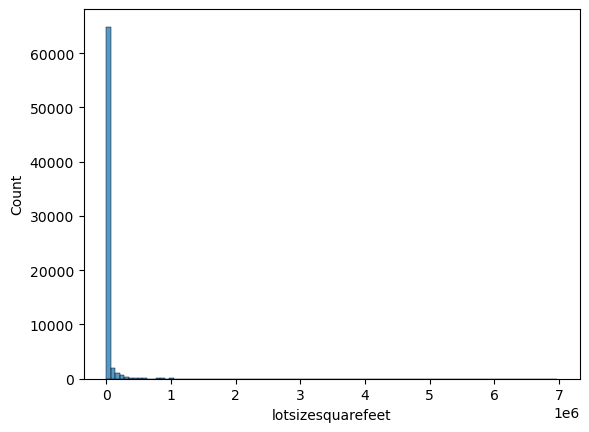

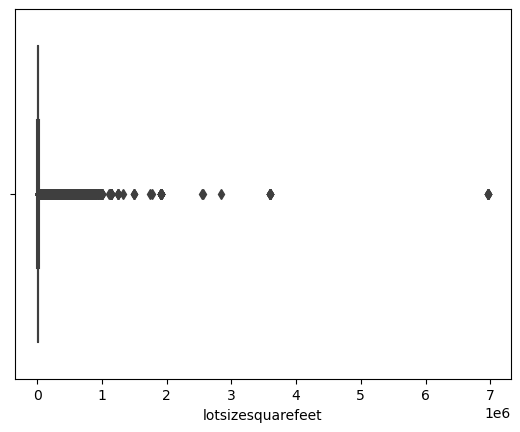

Distribution of rawcensustractandblock


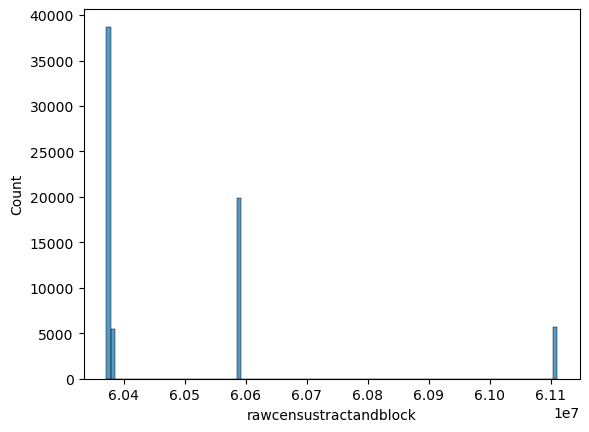

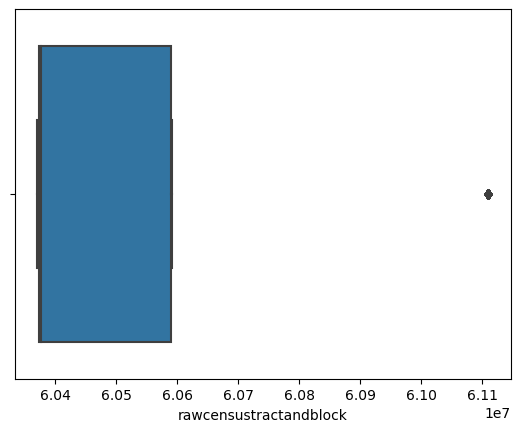

Distribution of regionidcity


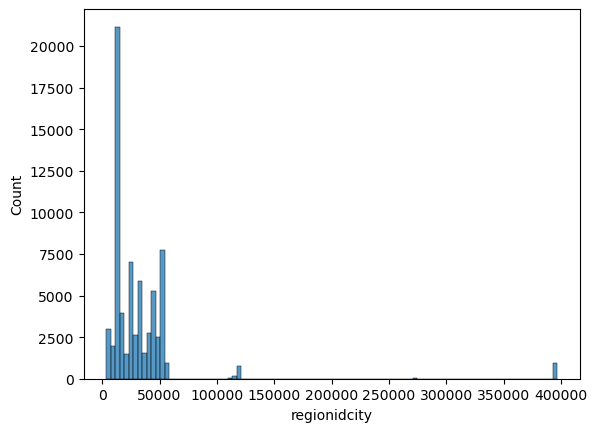

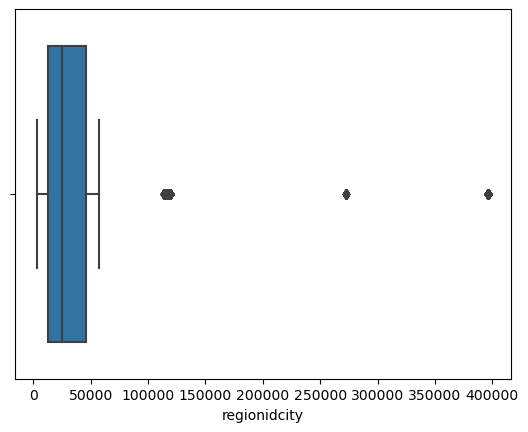

Distribution of regionidzip


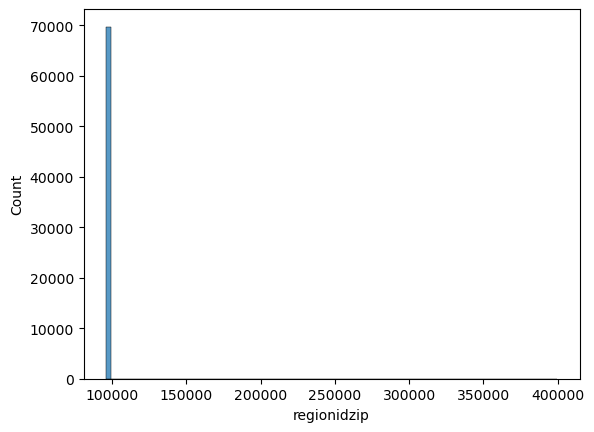

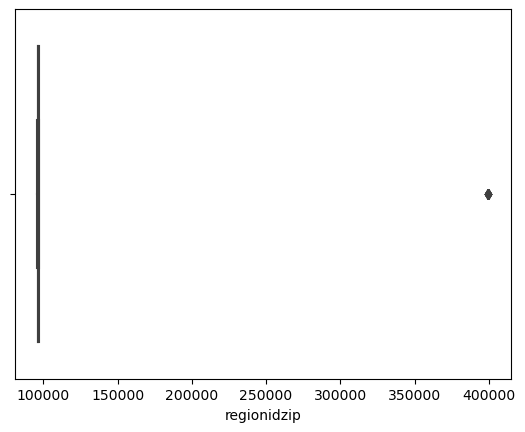

Distribution of roomcnt


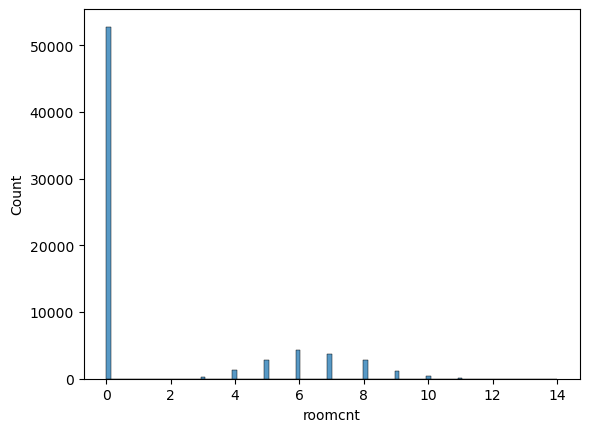

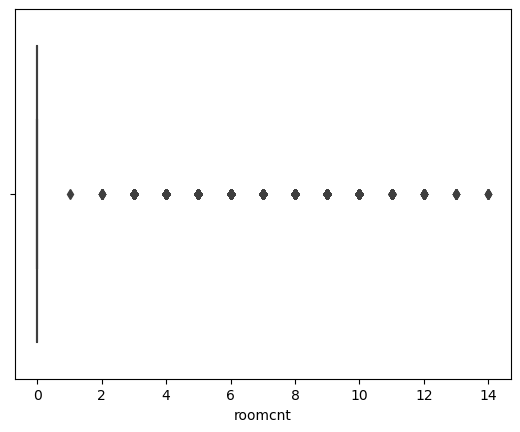

Distribution of yearbuilt


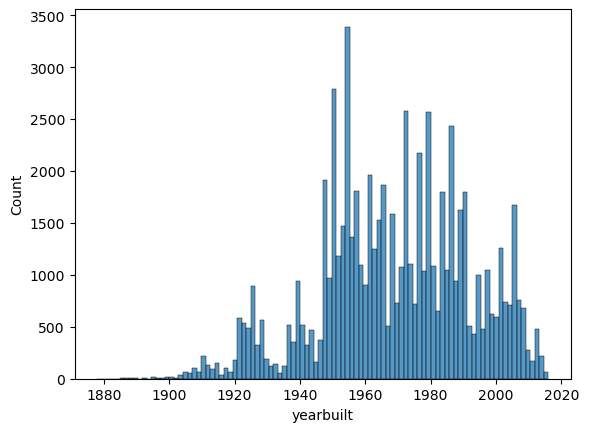

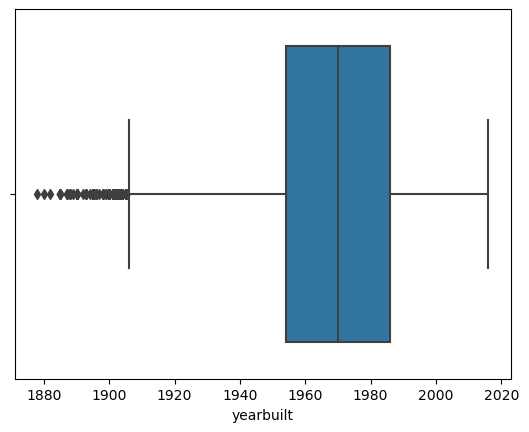

Distribution of structuretaxvaluedollarcnt


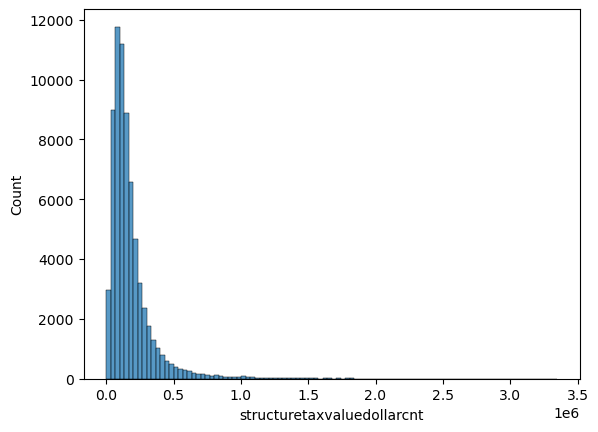

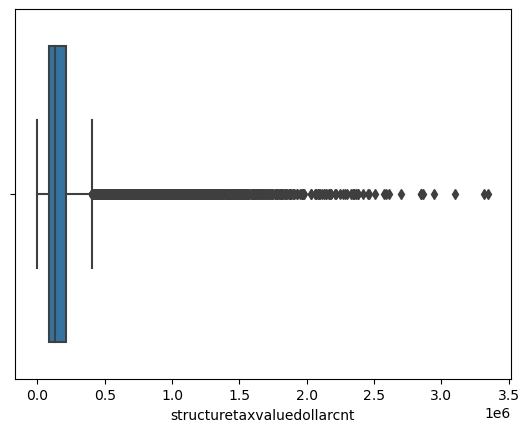

Distribution of taxvaluedollarcnt


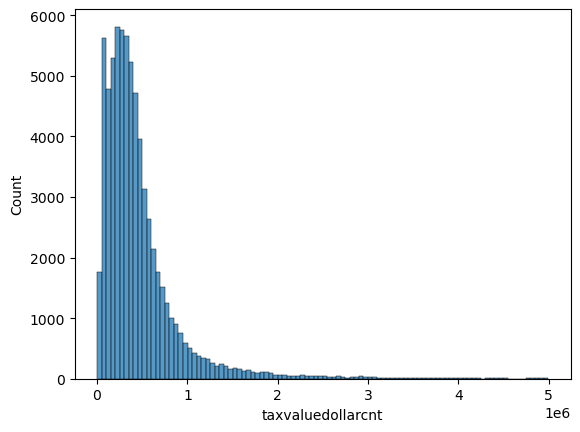

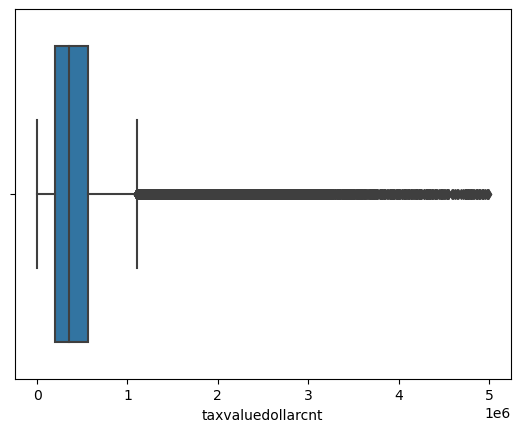

Distribution of landtaxvaluedollarcnt


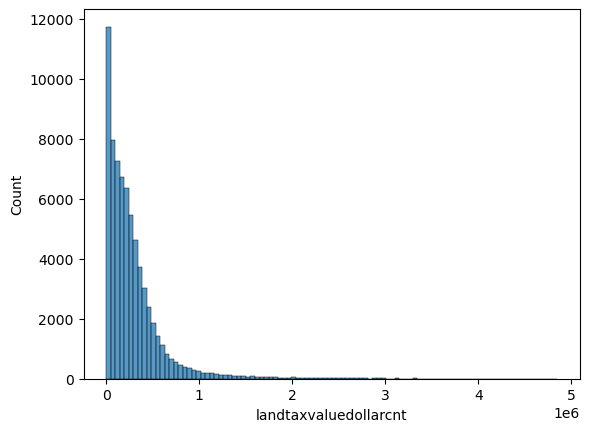

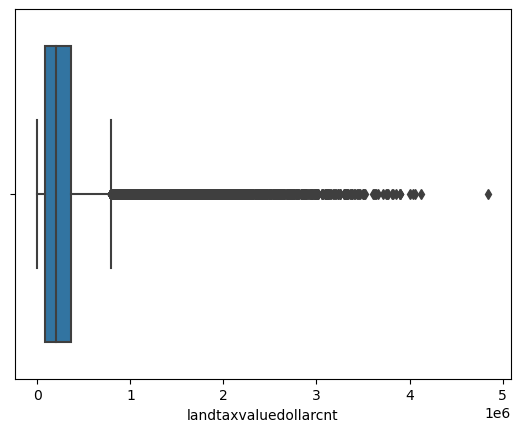

Distribution of taxamount


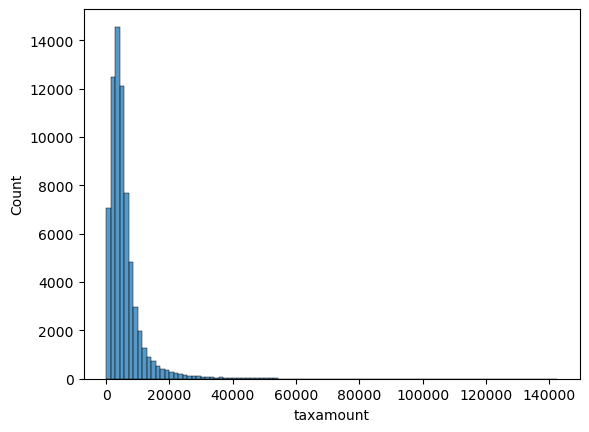

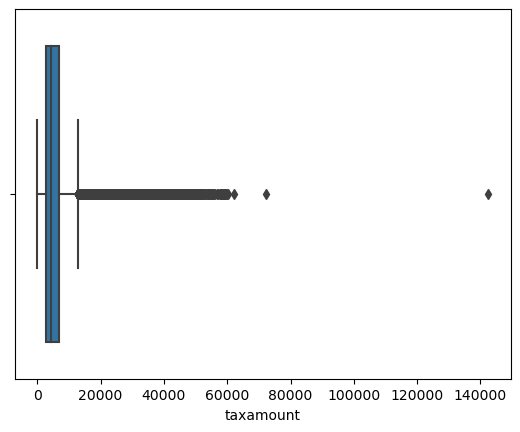

Distribution of logerror


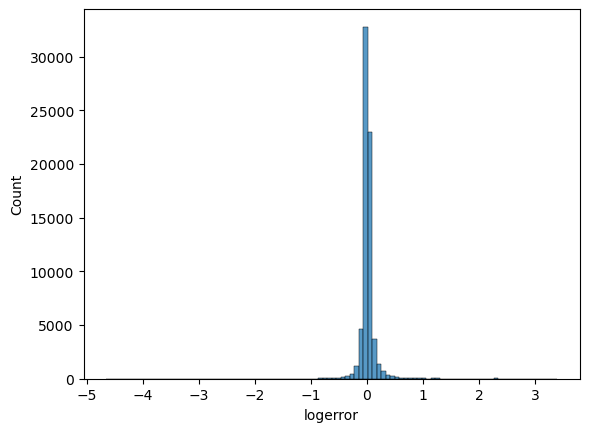

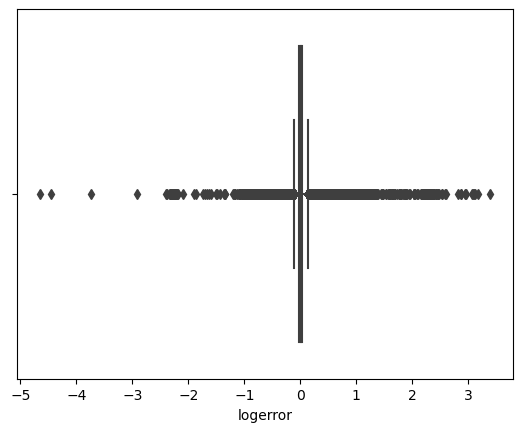

In [10]:
# Quantitative first:
for col in num_cols:
    # print out the title:
    print (f'Distribution of {col}')
    # first graph is a histogram: 
    sns.histplot(data=df, x = col, bins = 100)
    plt.show()
    # second graph is boxplot
    #plt.boxplot(train[col])
    #plt.show()
    sns.boxplot(data=df, x = col)
    plt.show()
    print('=======================')

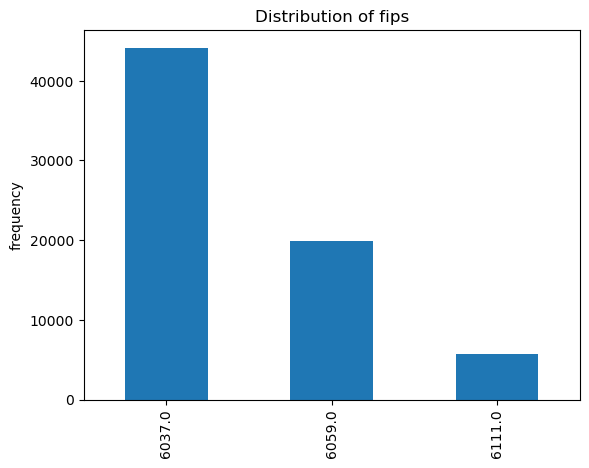

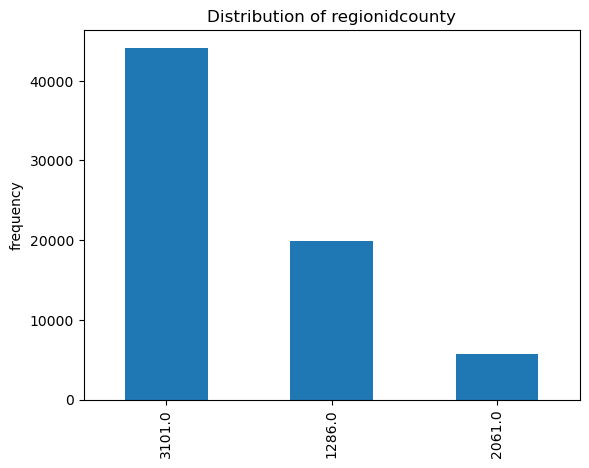

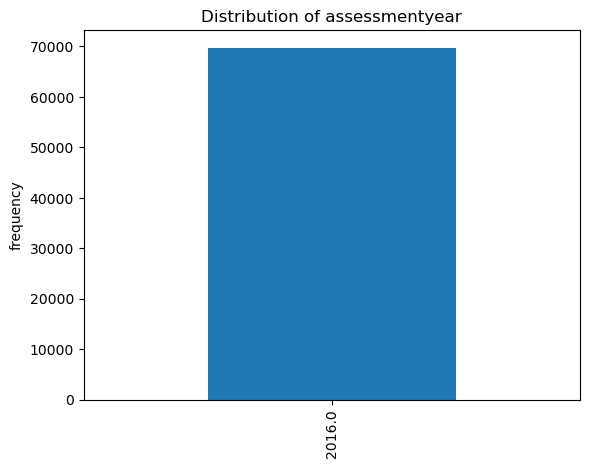

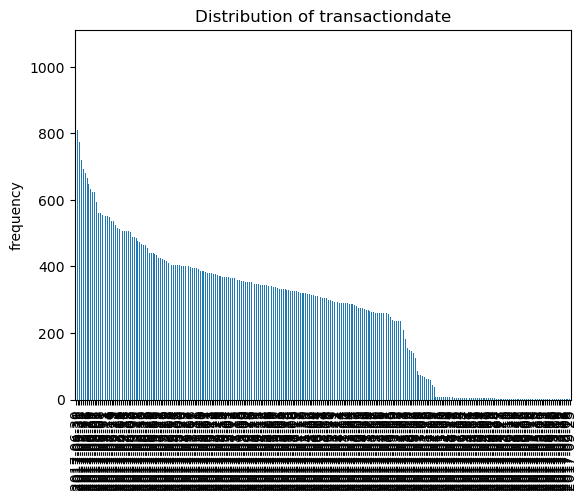

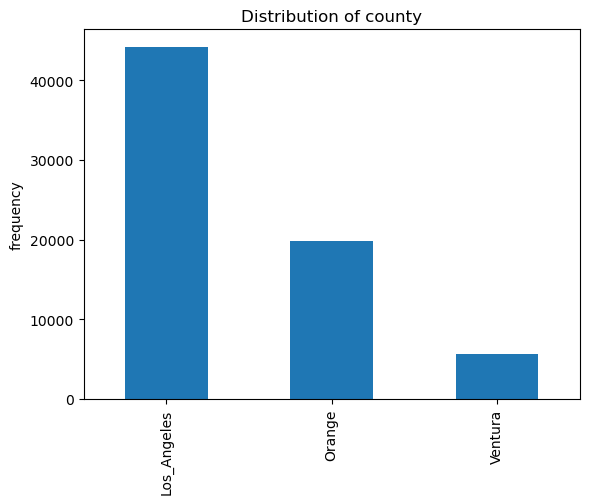

In [11]:
for col in cat_cols:
    df[col].value_counts().plot(
        kind='bar').set(
        title=f'Distribution of {col}')
    plt.ylabel("frequency")
    plt.show()

In [12]:
# want to remove the outlies
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''
    
    for col in col_list:
        
        # For each column, it calculates the first quartile (q1) and 
        #third quartile (q3) using the .quantile() method, where q1 
        #corresponds to the 25th percentile and q3 corresponds to the 75th percentile.
        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

In [13]:
df.shape

(69729, 22)

In [14]:

q1 = df.logerror.quantile(0.25)
q3 = df.logerror.quantile(0.75)
iqr = q3 - q1
k = 1.5

# calculate upper and lower ranges
upper_bound_income =  q3 + k * iqr
lower_bound_income =  q1 - k * iqr

lower_bound_income, upper_bound_income

(-0.11661548994085, 0.13108588947715)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train, test = train_test_split(df, train_size = 0.8, random_state = 123)
train, validate = train_test_split(train, train_size = 0.75, random_state = 123)

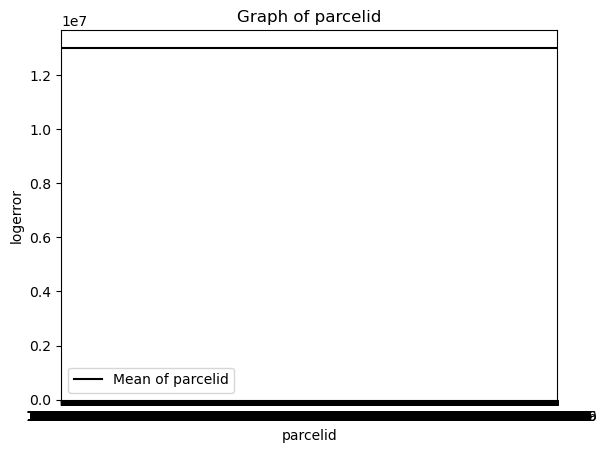

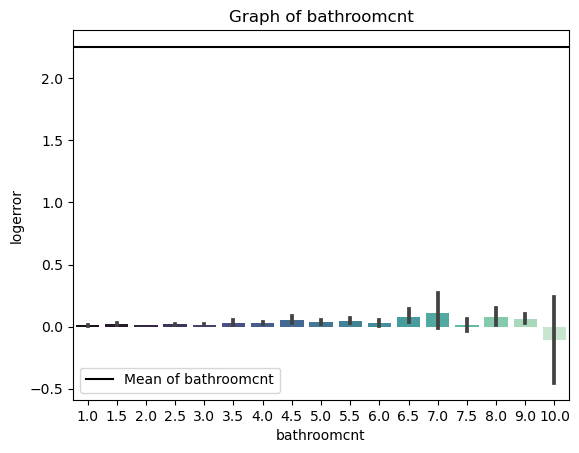

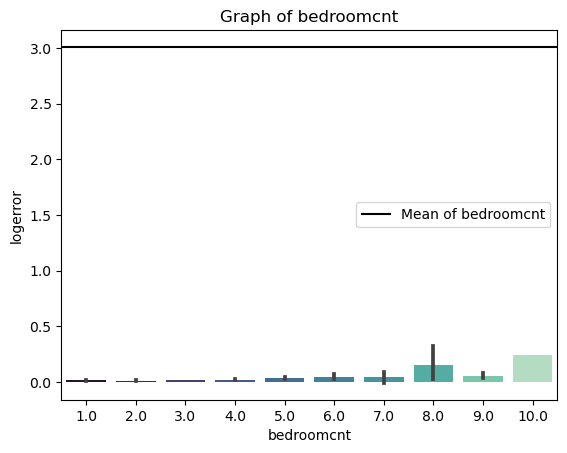

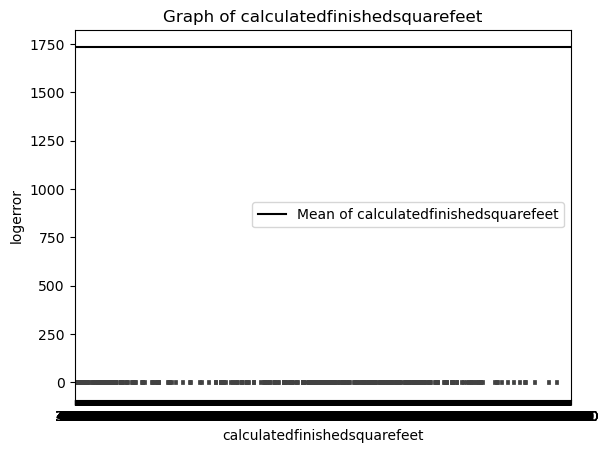

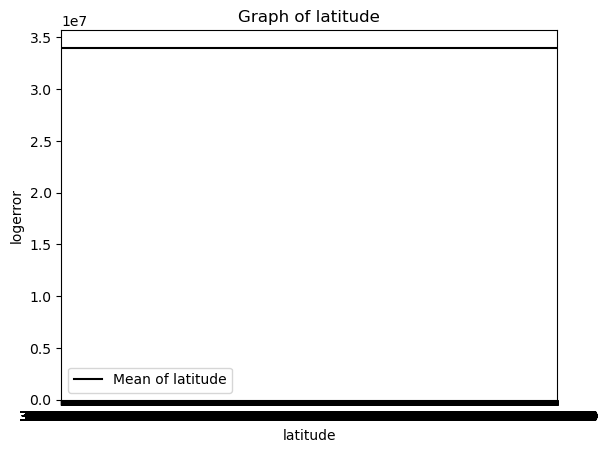

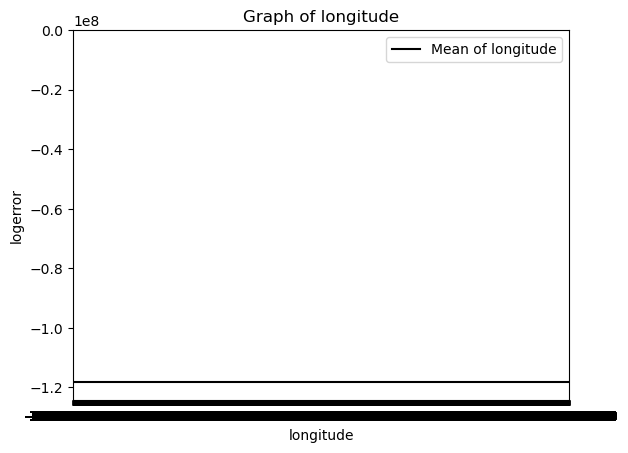

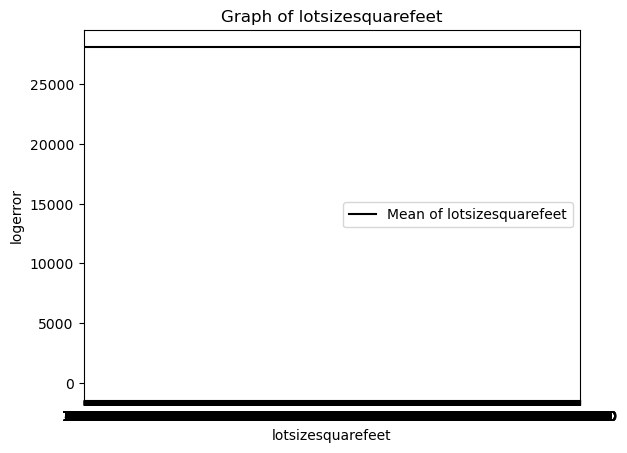

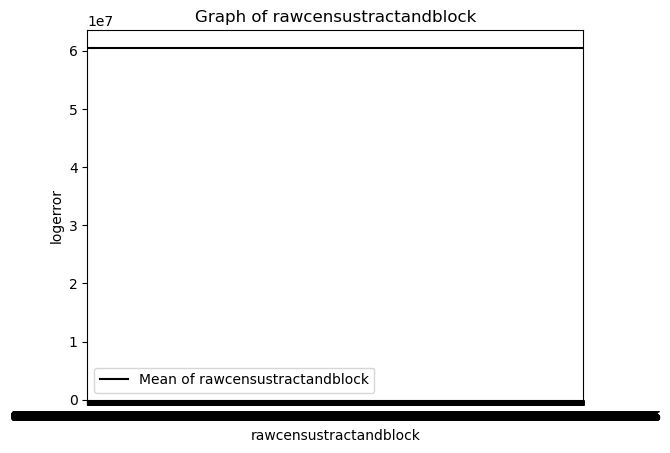

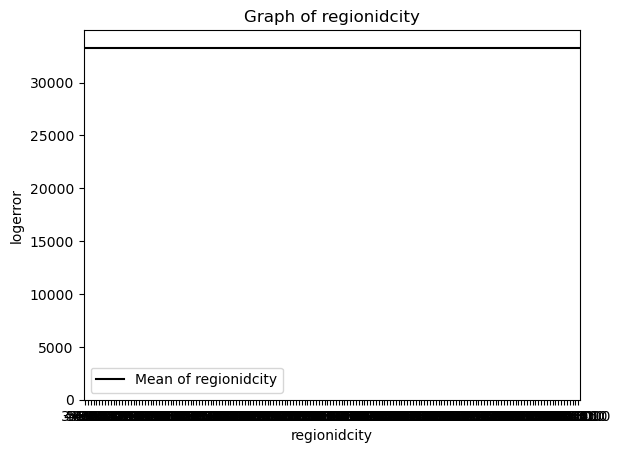

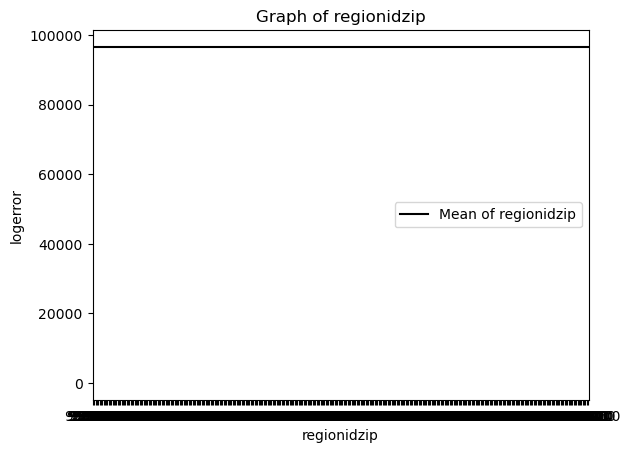

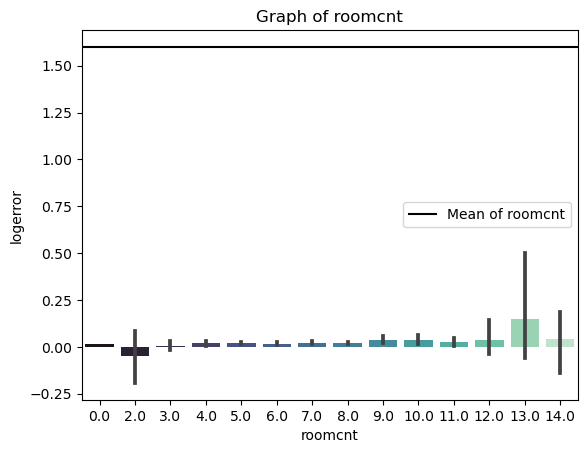

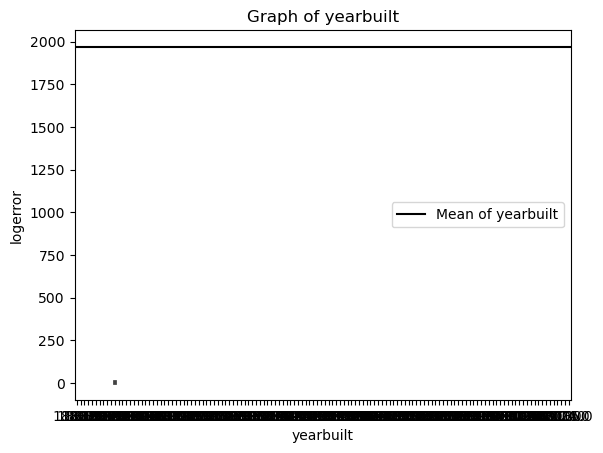

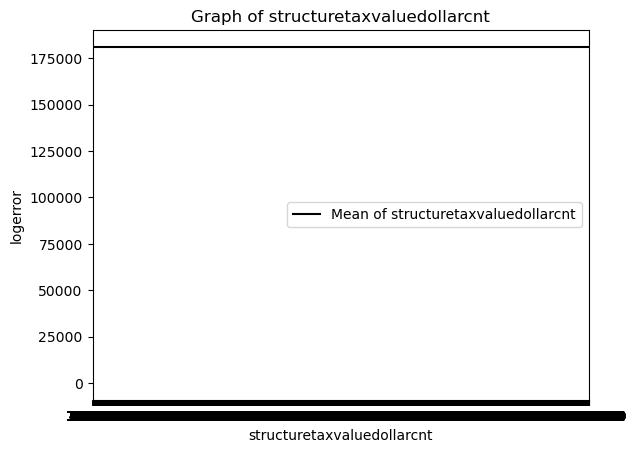

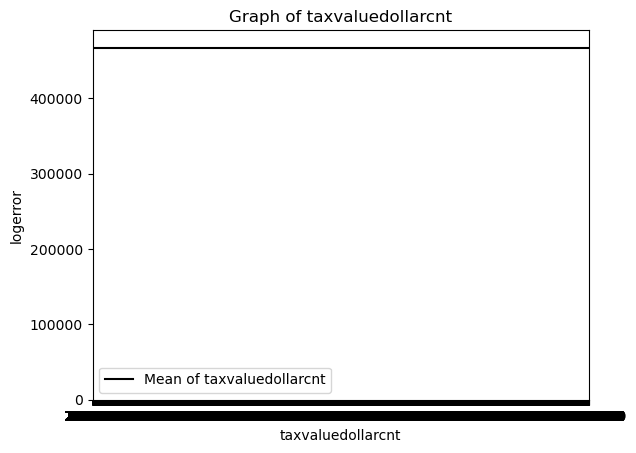

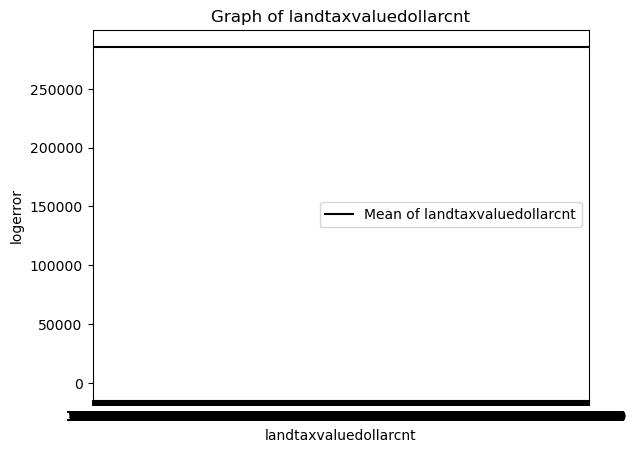

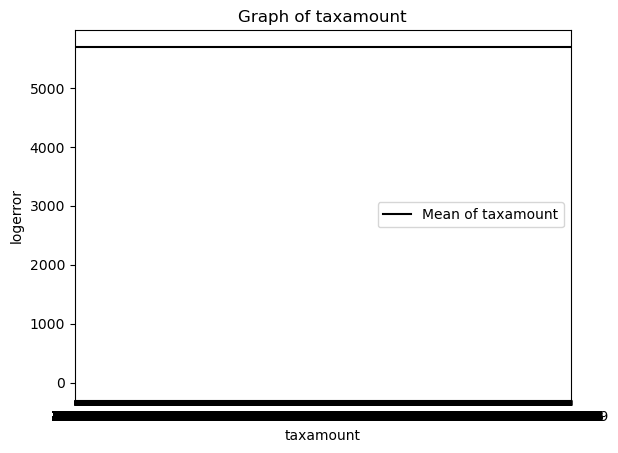

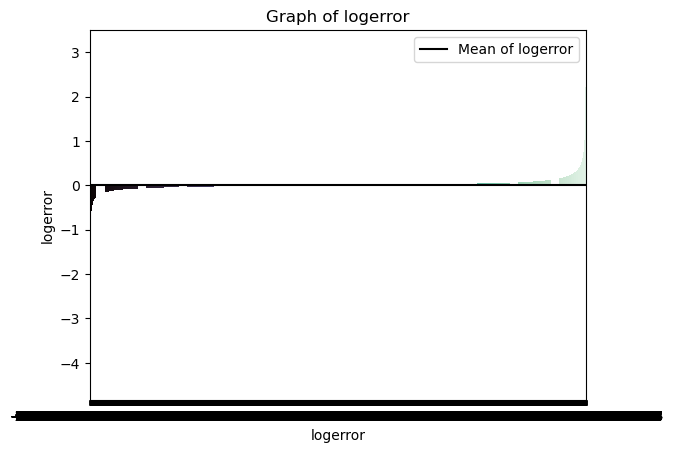

In [19]:
# bar plot
for col in num_cols:
    plt.title(f'Graph of {col}')
    sns.barplot(x = col , y = target, data = train, palette = 'mako')
    col_mean = train[col].mean()
    plt.axhline(col_mean, label = (f'Mean of {col}'), color = 'black')
    plt.legend()
    
    plt.show()

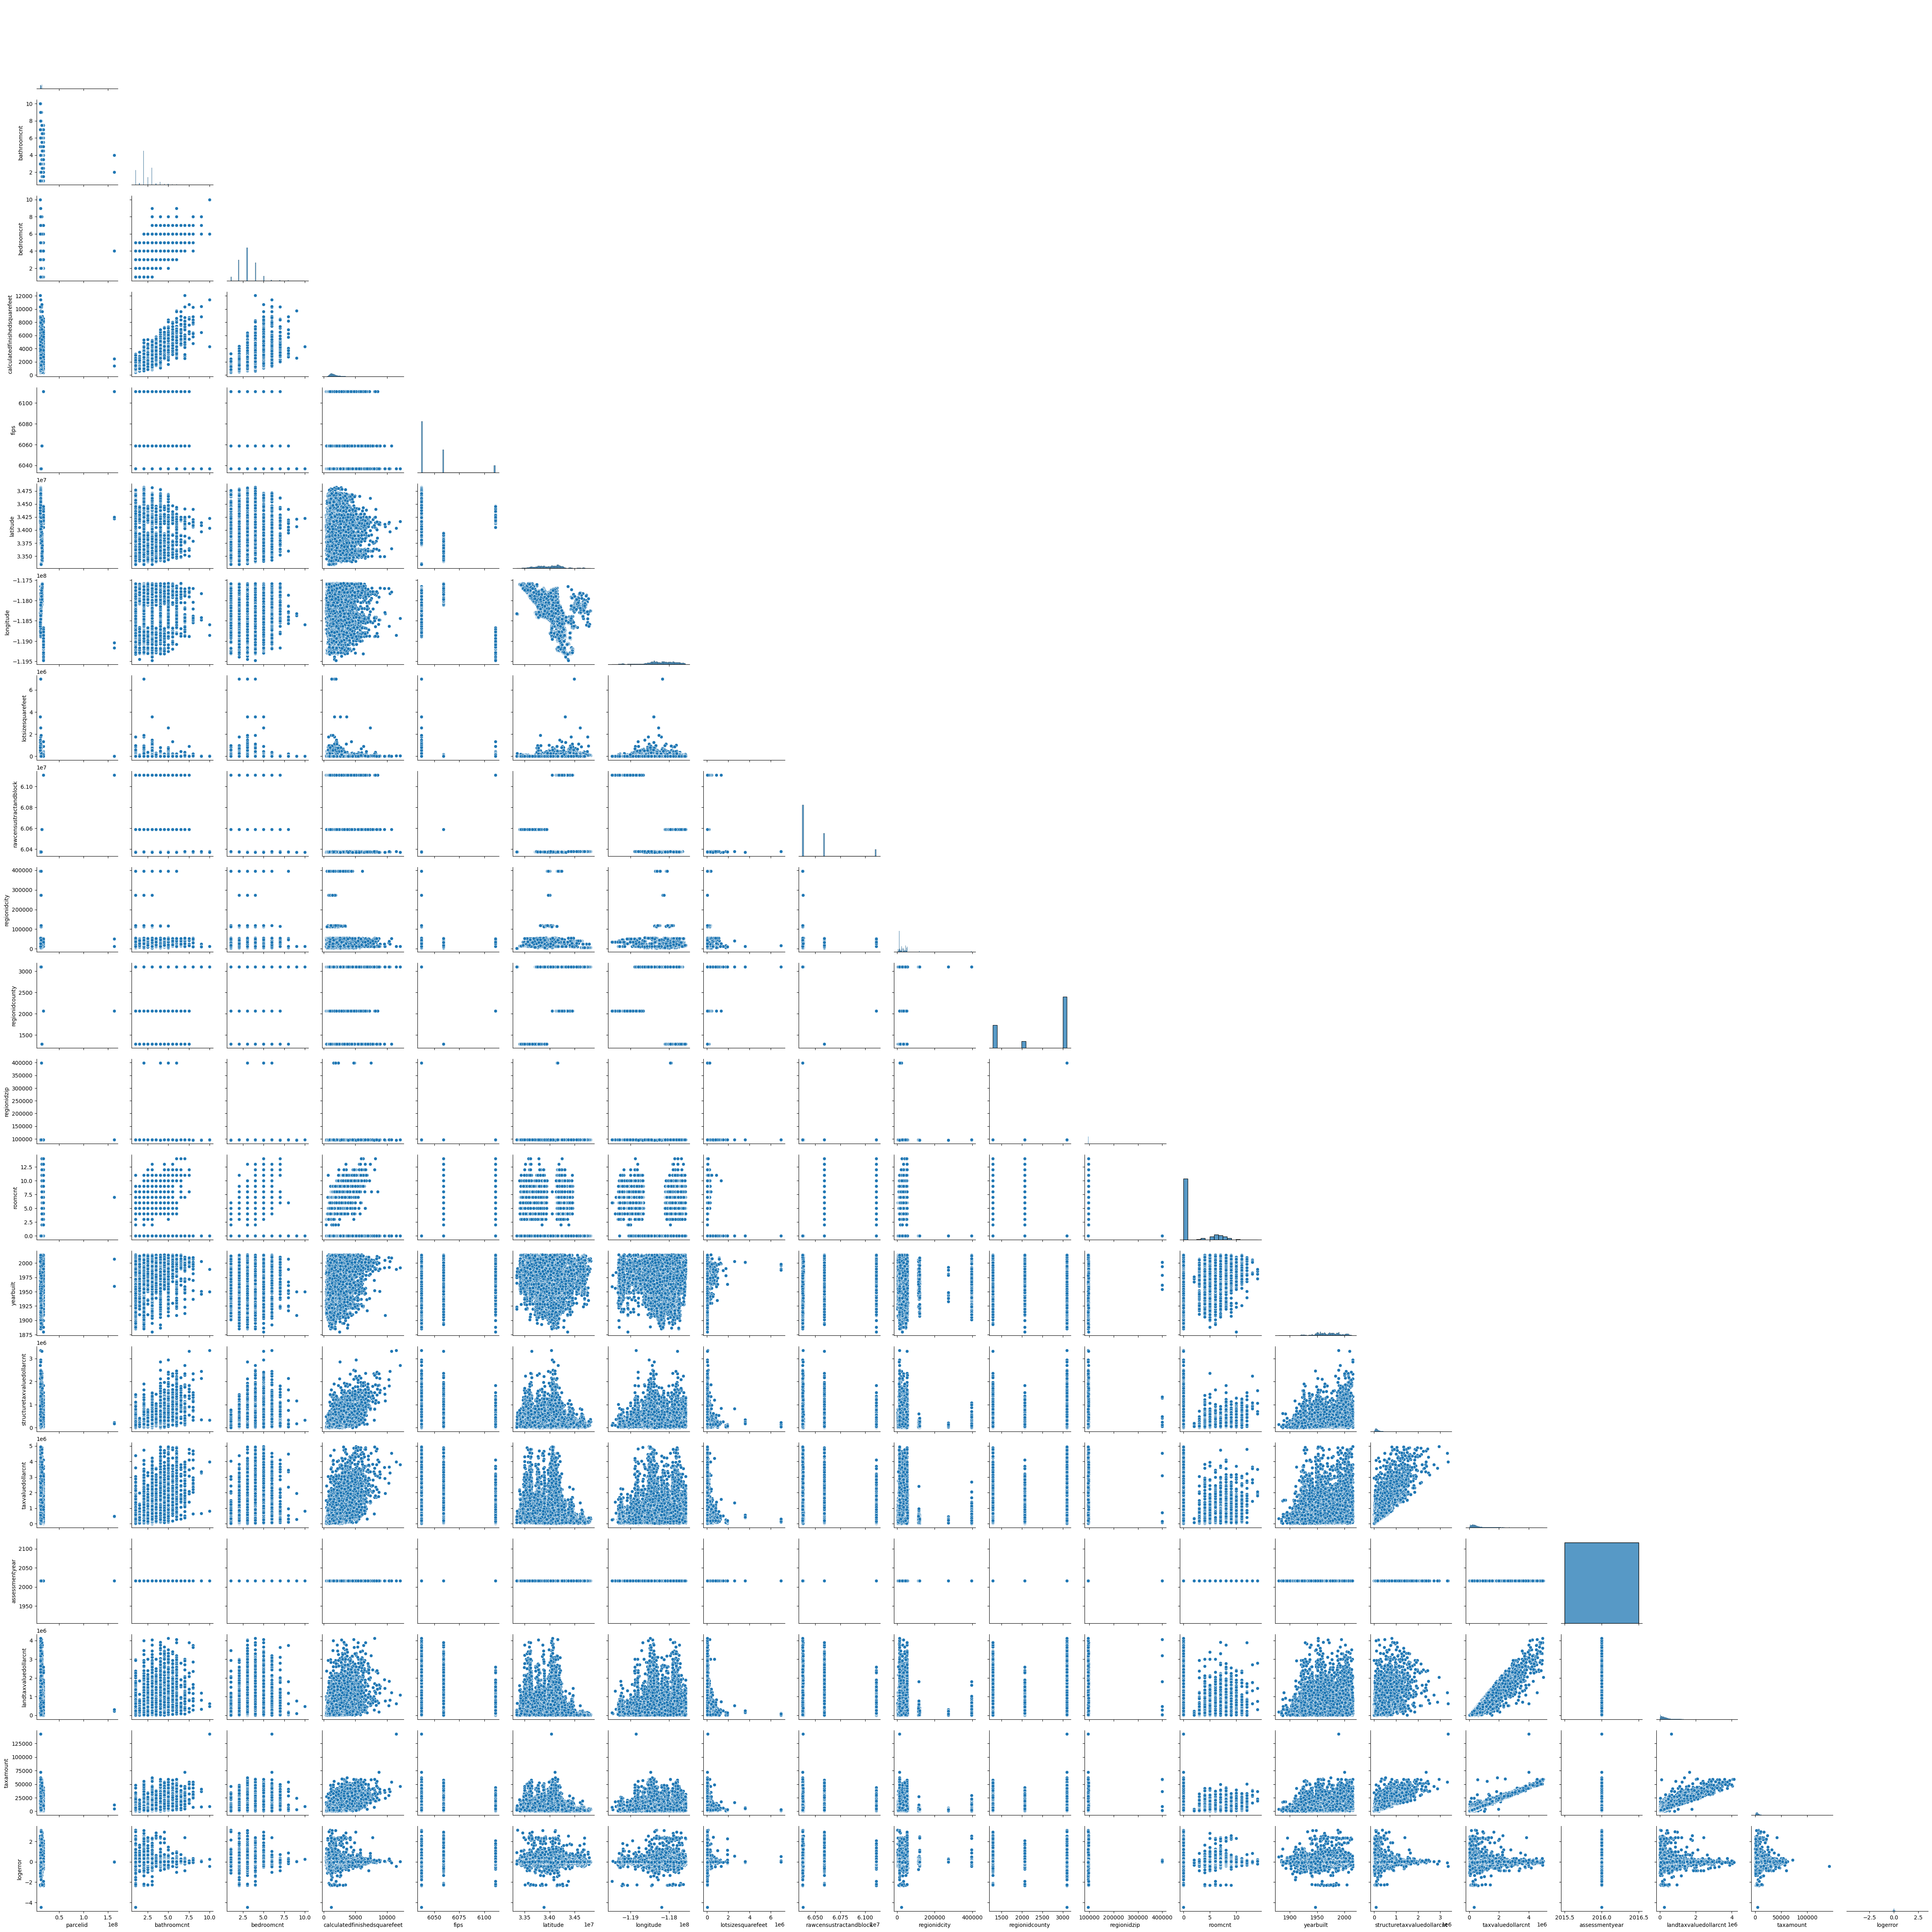

In [21]:
sns.pairplot(train, corner = True)

Look at calculatedfinsihedquarefeet, roomcount, taxvaluedollarcnt, bedroomcnt, 